# Heuristics of Delaunay

Using Cohen-Lenstra's theory Delaunay conjectured a formula to compute the probability that rank of the Sha $p$ torsion is the given even integer. We verify his results for congruent number curves. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table
from math import prod

df = pd.read_csv("data_with_mod8.csv", usecols=["n", "rank", "mod8", "2selmer_rank"])

df_rank0 = df[df['rank'] == 0].copy()
df_rank0['sha2'] = df_rank0['2selmer_rank'] - 2

df_rank1 = df[df['rank'] == 1].copy()
df_rank1['sha2'] = df_rank1['2selmer_rank'] - 3

,n,rank,2selmer_rank,mod8,sha2
3,6,1,3,6,0
4,5,1,3,5,0
5,7,1,3,7,0
7,14,1,3,6,0
9,13,1,3,5,0
...,...,...,...,...,...
607913,999967,1,3,7,0
607918,999983,1,3,7,0
607921,999989,1,3,5,0
607922,999991,1,3,7,0


In [2]:
# Count frequency
empirical_counts = df_rank0["sha2"].value_counts().sort_index()
empirical_probs = empirical_counts / empirical_counts.sum()
print(empirical_probs)

sha2
0    0.537640
2    0.446769
4    0.015588
6    0.000004
Name: count, dtype: float64


In [3]:
def sha_r2_equals_2n_probability(r, k_max=30):
    """
    Computes Delaunay's probability that r_2(Sha) = 2n for rank 0 curves, p=2.
    Parameters:
        r: integer, the value of r (so r_2 = 2r).
        k_max: truncate the infinite product at k_max (should be >= r+15).
    Returns:
        float: the probability.
    """

    leading = 2 ** (-r * (2 * r - 1))
    prod0_terms = [(1 - 2 ** (-(2 * k))) for k in range(1, r + 1)]
    denom = prod(prod0_terms)
    product_terms = [(1 - 2 ** (-(2 * k - 1))) for k in range(r + 1, k_max + 1)]
    prod_part = prod(product_terms)

    return (leading/denom) * prod_part

N = 3  # Number of terms (max r)
max_index = 2 * N  # max index needed in array
delaunay_probs = {}

for r in range(N + 1):
    index = 2 * r
    prob = sha_r2_equals_2n_probability(r)
    delaunay_probs[index] = prob

# Print or inspect the results
for i in range(0, max_index + 1, 2):
    print(f"delaunay_probs[{i}] = {delaunay_probs[i]:.6f}")


delaunay_probs[0] = 0.419422
delaunay_probs[2] = 0.559230
delaunay_probs[4] = 0.021304
delaunay_probs[6] = 0.000044


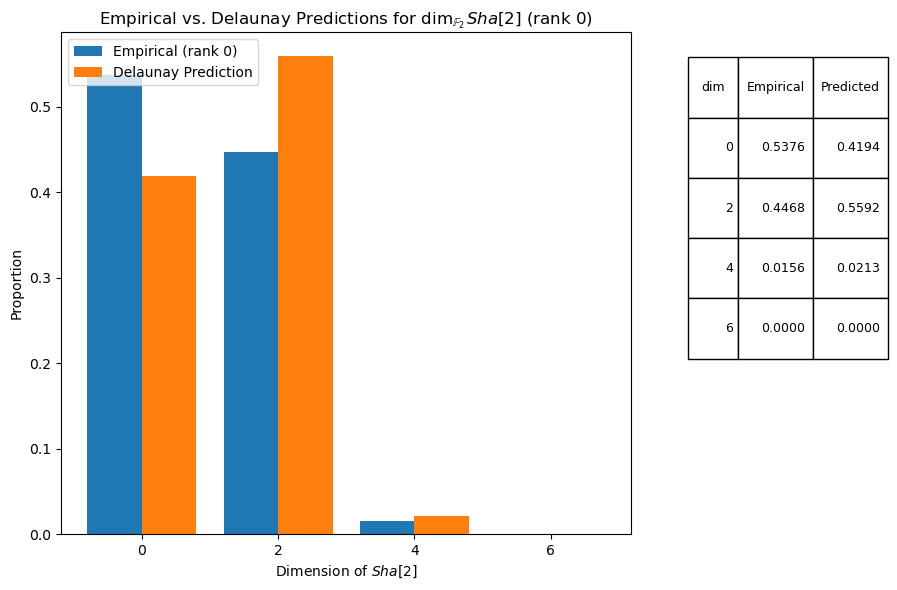

In [4]:
# ---  Plotting ---

all_ranks = sorted(set(empirical_probs.index).union(delaunay_probs.keys()))
empirical = [empirical_probs.get(r, 0) for r in all_ranks]
predicted = [delaunay_probs.get(r, 0) for r in all_ranks]

x = np.arange(len(all_ranks))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
bars1 = ax.bar(x - width/2, empirical, width, label='Empirical (rank 0)')
bars2 = ax.bar(x + width/2, predicted, width, label='Delaunay Prediction')

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(all_ranks)
ax.set_xlabel("Dimension of $Sha[2]$")
ax.set_ylabel("Proportion")
ax.set_title("Empirical vs. Delaunay Predictions for $\dim_{\mathbb{F}_2} Sha[2]$ (rank 0)")

# Legend
ax.legend(loc="upper left")

# ---  Add Table to Right ---
# Table data
table_data = [
    [f"{r}", f"{e:.4f}", f"{t:.4f}"]
    for r, e, t in zip(all_ranks, empirical, predicted)
]

# Add table to figure for better layout

# Table header
col_labels = ["dim", "Empirical", "Predicted"]
table = plt.table(
    cellText=table_data,
    colLabels=col_labels,
    colWidths=[0.4, 0.6, 0.6],
    cellLoc='right',
    loc='right',
    bbox=[1.1, 0.35, 0.35, 0.6]
)

table.scale(2, 1)

plt.tight_layout()
plt.savefig("delaunay_rank0.jpeg", dpi=300, bbox_inches="tight")

In [5]:
def sha_r2_equals_2n_probability(n, k_max=30):
    """
    Computes Delaunay's probability that r_2(Sha) = 2n for rank 1 curves, p=2.
    Parameters:
        r: integer, the value of r (so r_2 = 2n).
        k_max: truncate the infinite product at k_max.
    Returns:
        float: the probability.
    """

    leading = 2 ** (-n * (2 * n + 1))
    prod0_terms = [(1 - 2 ** (-(2 * k))) for k in range(1, n + 1)]
    denom = prod(prod0_terms)
    product_terms = [(1 - 2 ** (-(2 * k + 1))) for k in range(n + 1, k_max + 1)]
    prod_part = prod(product_terms)

    return (leading/denom) * prod_part

N = 3  # Number of terms (max r)
max_index = 2 * N  # max index needed in array
delaunay_probs1 = {}

for r in range(N + 1):
    index = 2 * r
    prob = sha_r2_equals_2n_probability(r)
    delaunay_probs1[index] = prob

# Print or inspect the results
for i in range(0, max_index + 1, 2):
    print(f"delaunay_probs[{i}] = {delaunay_probs[i]:.6f}")

delaunay_probs[0] = 0.419422
delaunay_probs[2] = 0.559230
delaunay_probs[4] = 0.021304
delaunay_probs[6] = 0.000044


sha2
0    0.869684
2    0.129400
4    0.000915
Name: count, dtype: float64


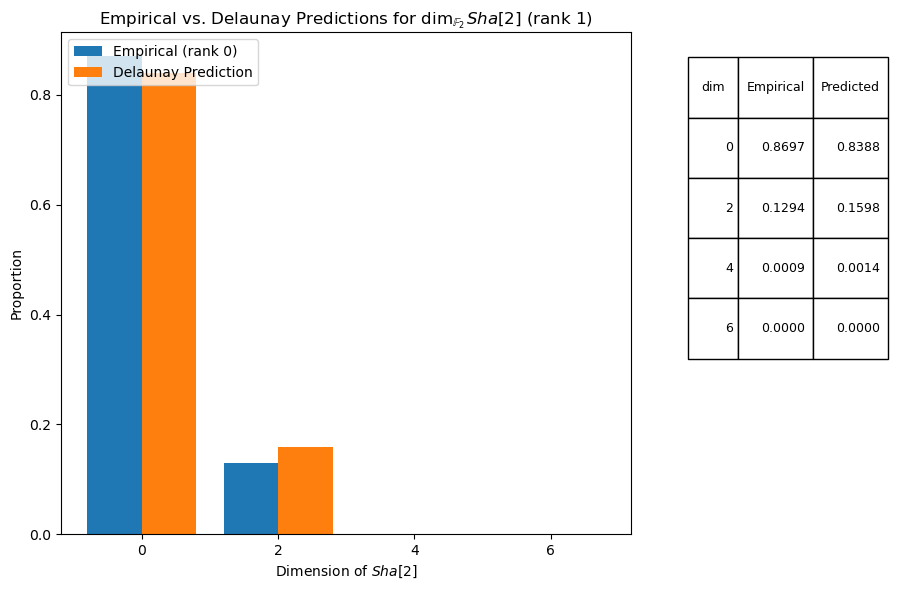

In [6]:
# # Count frequency
empirical_counts1 = df_rank1["sha2"].value_counts().sort_index()
empirical_probs1 = empirical_counts1 / empirical_counts1.sum()
print(empirical_probs1)


all_ranks = sorted(set(empirical_probs.index).union(delaunay_probs1.keys()))
empirical = [empirical_probs1.get(r, 0) for r in all_ranks]
predicted = [delaunay_probs1.get(r, 0) for r in all_ranks]

# --- Plotting ---
x = np.arange(len(all_ranks))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
bars1 = ax.bar(x - width/2, empirical, width, label='Empirical (rank 0)')
bars2 = ax.bar(x + width/2, predicted, width, label='Delaunay Prediction')

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(all_ranks)
ax.set_xlabel("Dimension of $Sha[2]$")
ax.set_ylabel("Proportion")
ax.set_title("Empirical vs. Delaunay Predictions for $\dim_{\mathbb{F}_2} Sha[2]$ (rank 1)")

# Legend
ax.legend(loc="upper left")

# ---  Add Table to Right ---
# Table data
table_data = [
    [f"{r}", f"{e:.4f}", f"{t:.4f}"]
    for r, e, t in zip(all_ranks, empirical, predicted)
]

# Table header
col_labels = ["dim", "Empirical", "Predicted"]
table = plt.table(
    cellText=table_data,
    colLabels=col_labels,
    colWidths=[0.4, 0.6, 0.6],
    cellLoc='right',
    loc='right',
    bbox=[1.1, 0.35, 0.35, 0.6]
)

table.scale(2, 1)

plt.tight_layout()
plt.savefig("delaunay_rank1.jpeg", dpi=300, bbox_inches="tight")

**Delaunay Heuristics for Sha[3]**

In [3]:
import pandas as pd

# --- Configuration ---

file1 = "data_with_mod8.csv"
file2 = "threeselmer.csv"


# Specify the columns to keep from each file (including 'n')
cols_file1 = ["n", "rank", "mod8"]  # Replace with actual column names from file1
cols_file2 = ["n", "3selmer_rank"]  # Replace with actual column names from file2

# --- Load and preprocess each file ---

df1 = pd.read_csv(file1, usecols=cols_file1).set_index("n")
df2 = pd.read_csv(file2, usecols=cols_file2).set_index("n")

# --- Join on common 'n' values only ---

combined_df = df1.join(df2, how="inner")  # intersection of n
combined_df['sha3'] = combined_df['3selmer_rank'] - combined_df['rank']

# --- Result ---

print(combined_df)  # preview

# Optional: save to a new CSV
combined_df.to_csv("cn_sha3.csv")

       rank  mod8  3selmer_rank  sha3
n                                    
1         0     1             0     0
1         0     1             0     0
2         0     2             0     0
2         0     2             0     0
3         0     3             0     0
...     ...   ...           ...   ...
95219     0     3             0     0
95221     1     5             1     0
95223     1     7             1     0
95231     1     7             1     0
95233     0     1             2     2

[59110 rows x 4 columns]


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table
from math import prod

df = pd.read_csv("cn_sha3.csv")

df_rank0 = df[df['rank'] == 0].copy()

df_rank1 = df[df['rank'] == 1].copy()

In [5]:
def sha_r3_equals_2n_probability(r, k_max=30):
    """
    Computes Delaunay's probability that r_3(Sha) = 2n for rank 0 curves, p=3.
    Parameters:
        r: integer, the value of r (so r_2 = 2r).
        k_max: truncate the infinite product at k_max (should be >= r+15).
    Returns:
        float: the probability.
    """

    leading = 3 ** (-r * (2 * r - 1))
    prod0_terms = [(1 - 3 ** (-(2 * k))) for k in range(1, r + 1)]
    denom = prod(prod0_terms)
    product_terms = [(1 - 3 ** (-(2 * k - 1))) for k in range(r + 1, k_max + 1)]
    prod_part = prod(product_terms)

    return (leading/denom) * prod_part

N = 3  # Number of terms (max r)
max_index = 2 * N  # max index needed in array
delaunay_probs = {}

for r in range(N + 1):
    index = 2 * r
    prob = sha_r3_equals_2n_probability(r)
    delaunay_probs[index] = prob

# Print or inspect the results
for i in range(0, max_index + 1, 2):
    print(f"Sha3 delaunay_probs[{i}] = {delaunay_probs[i]:.6f}")


Sha3 delaunay_probs[0] = 0.639005
Sha3 delaunay_probs[2] = 0.359440
Sha3 delaunay_probs[4] = 0.001555
Sha3 delaunay_probs[6] = 0.000000


In [7]:
# Count Empirical probabilities
empirical_counts = df_rank0["sha3"].value_counts().sort_index()
empirical_probs = empirical_counts / empirical_counts.sum()
print(empirical_probs)

sha3
0    0.75182
2    0.24791
4    0.00027
Name: count, dtype: float64


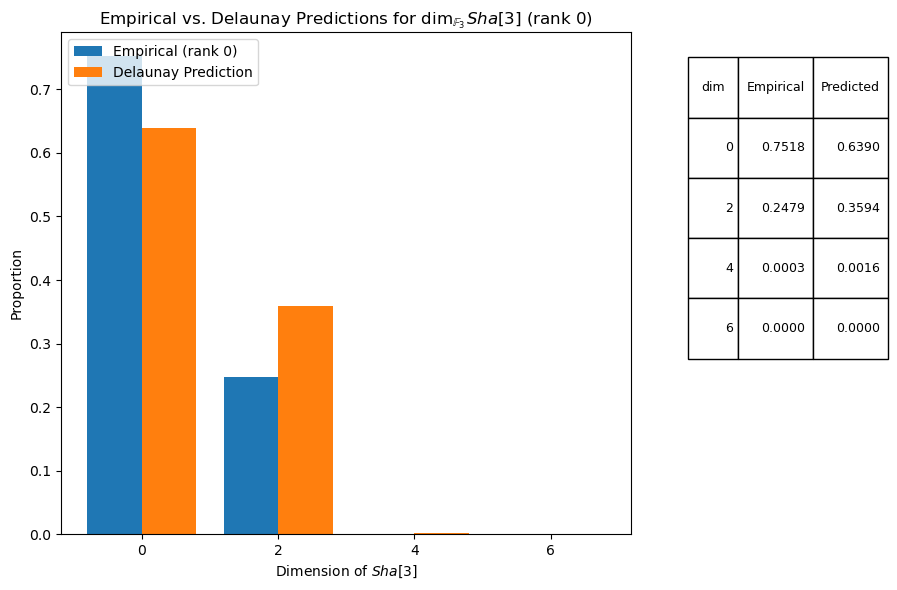

In [8]:
# ---  Plotting ---

all_ranks = sorted(set(empirical_probs.index).union(delaunay_probs.keys()))
empirical = [empirical_probs.get(r, 0) for r in all_ranks]
predicted = [delaunay_probs.get(r, 0) for r in all_ranks]

x = np.arange(len(all_ranks))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
bars1 = ax.bar(x - width/2, empirical, width, label='Empirical (rank 0)')
bars2 = ax.bar(x + width/2, predicted, width, label='Delaunay Prediction')

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(all_ranks)
ax.set_xlabel("Dimension of $Sha[3]$")
ax.set_ylabel("Proportion")
ax.set_title("Empirical vs. Delaunay Predictions for $\dim_{\mathbb{F}_3} Sha[3]$ (rank 1)")

# Legend
ax.legend(loc="upper left")

# ---  Add Table to Right ---
# Table data
table_data = [
    [f"{r}", f"{e:.4f}", f"{t:.4f}"]
    for r, e, t in zip(all_ranks, empirical, predicted)
]

# Add table to figure for better layout

# Table header
col_labels = ["dim", "Empirical", "Predicted"]
table = plt.table(
    cellText=table_data,
    colLabels=col_labels,
    colWidths=[0.4, 0.6, 0.6],
    cellLoc='right',
    loc='right',
    bbox=[1.1, 0.35, 0.35, 0.6]
)

table.scale(2, 1)

plt.tight_layout()
plt.savefig("delaunay_sha3_rank0.jpeg", dpi=300, bbox_inches="tight")

In [10]:
def sha_r3_equals_2n_probability(n, k_max=30):
    """
    Computes Delaunay's probability that r_3(Sha) = 2n for rank 1 curves, p=2.
    Parameters:
        r: integer, the value of r (so r_3 = 2n).
        k_max: truncate the infinite product at k_max.
    Returns:
        float: the probability.
    """

    leading = 3 ** (-n * (2 * n + 1))
    prod0_terms = [(1 - 3 ** (-(2 * k))) for k in range(1, n + 1)]
    denom = prod(prod0_terms)
    product_terms = [(1 - 3 ** (-(2 * k + 1))) for k in range(n + 1, k_max + 1)]
    prod_part = prod(product_terms)

    return (leading/denom) * prod_part

N = 3  # Number of terms (max r)
max_index = 2 * N  # max index needed in array
delaunay_probs1 = {}

for r in range(N + 1):
    index = 2 * r
    prob = sha_r3_equals_2n_probability(r)
    delaunay_probs1[index] = prob

# Print or inspect the results
for i in range(0, max_index + 1, 2):
    print(f"delaunay_probs[{i}] = {delaunay_probs[i]:.6f}")

delaunay_probs[0] = 0.639005
delaunay_probs[2] = 0.359440
delaunay_probs[4] = 0.001555
delaunay_probs[6] = 0.000000


sha3
0    0.974819
2    0.025181
Name: count, dtype: float64


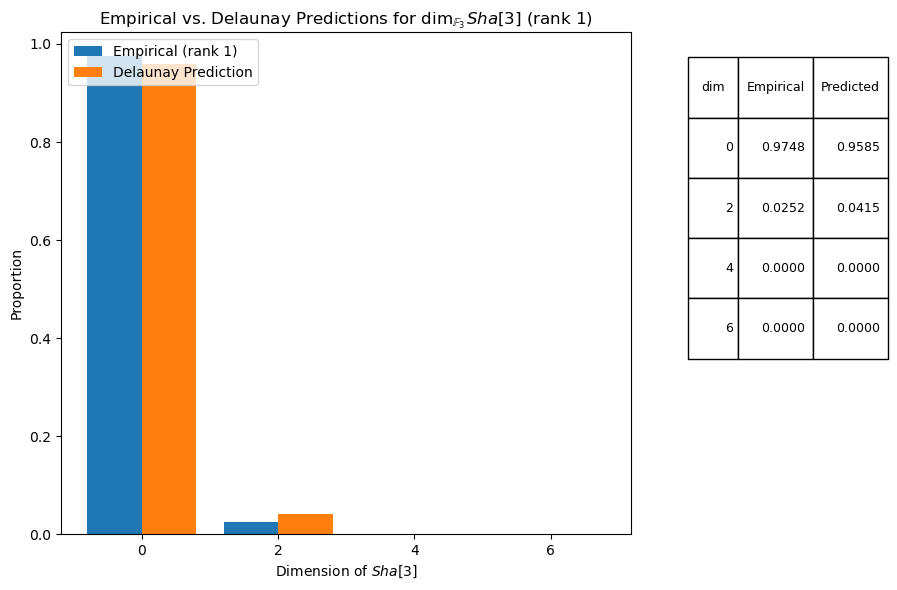

In [11]:
# # Count frequency
empirical_counts1 = df_rank1["sha3"].value_counts().sort_index()
empirical_probs1 = empirical_counts1 / empirical_counts1.sum()
print(empirical_probs1)


all_ranks = sorted(set(empirical_probs.index).union(delaunay_probs1.keys()))
empirical = [empirical_probs1.get(r, 0) for r in all_ranks]
predicted = [delaunay_probs1.get(r, 0) for r in all_ranks]

# --- Plotting ---
x = np.arange(len(all_ranks))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
bars1 = ax.bar(x - width/2, empirical, width, label='Empirical (rank 1)')
bars2 = ax.bar(x + width/2, predicted, width, label='Delaunay Prediction')

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(all_ranks)
ax.set_xlabel("Dimension of $Sha[3]$")
ax.set_ylabel("Proportion")
ax.set_title("Empirical vs. Delaunay Predictions for $\dim_{\mathbb{F}_3} Sha[3]$ (rank 1)")

# Legend
ax.legend(loc="upper left")

# ---  Add Table to Right ---
# Table data
table_data = [
    [f"{r}", f"{e:.4f}", f"{t:.4f}"]
    for r, e, t in zip(all_ranks, empirical, predicted)
]

# Table header
col_labels = ["dim", "Empirical", "Predicted"]
table = plt.table(
    cellText=table_data,
    colLabels=col_labels,
    colWidths=[0.4, 0.6, 0.6],
    cellLoc='right',
    loc='right',
    bbox=[1.1, 0.35, 0.35, 0.6]
)

table.scale(2, 1)

plt.tight_layout()
plt.savefig("delaunay_sha3_rank1.jpeg", dpi=300, bbox_inches="tight")